# 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까?

### 컬럼명
- Name : 게임의 이름
- Platform : 게임이 동작하는 콘솔
- Year_of_Release : 발매 년도
- Genre : 게임의 장르
- Publisher : 게임의 유통사
- NA_Sales : 북미 판매량 (Milions)
- EU_Sales : 유럽 판매량 (Milions)
- JP_Sales : 일본 판매량 (Milions)
- Other_Sales : 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미)
- Global_Sales : 전국 판매량
- Critic_Scroe : Metacritic 스태프 점수
- Critic_Count : Critic_Scroe에 사용된 점수의 수
- User_Score : MetaCritic 구독자의 점수
- User_Count : User_Score에 사용된 점수
- Developer : 게임의 개발사
- Rating : ESBR 등급 (19+, 17+ 등등)
<br>

- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'gustn6839'
os.environ['KAGGLE_KEY'] = 

In [3]:
!rm *.*
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 65.7MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


In [6]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

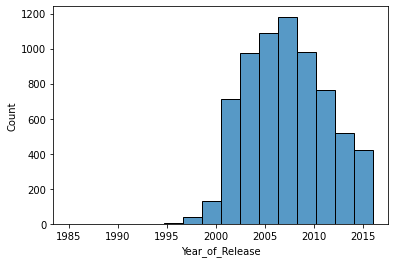

In [10]:
sns.histplot(x = 'Year_of_Release', data=df, bins=16)

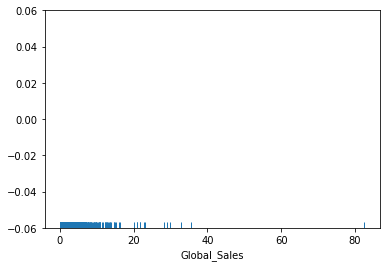

In [13]:
sns.rugplot(x = 'Global_Sales', data=df)

In [16]:
df[df['Global_Sales'] > 30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [19]:
gs = df['Global_Sales'].quantile(0.99)
print(gs)

7.167600000000002


In [20]:
# outlier 제거
df = df[df['Global_Sales'] < gs]

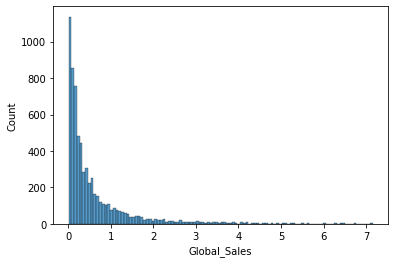

In [21]:
sns.histplot(x='Global_Sales', data=df)

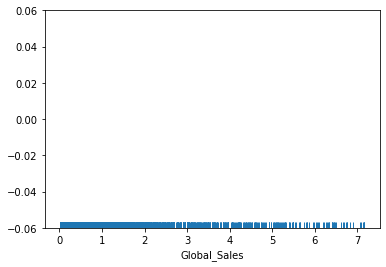

In [22]:
sns.rugplot(x = 'Global_Sales', data=df)

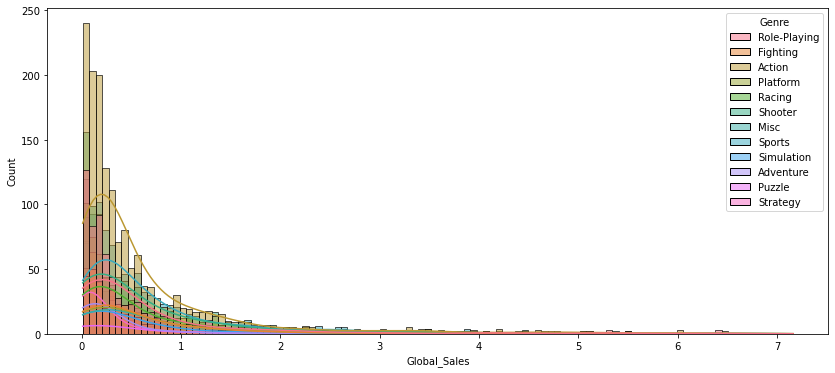

In [26]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Global_Sales', hue='Genre', data=df, kde=True);

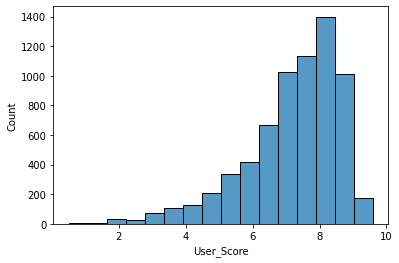

In [28]:
sns.histplot(data=df['User_Score'].apply(float), bins=16)

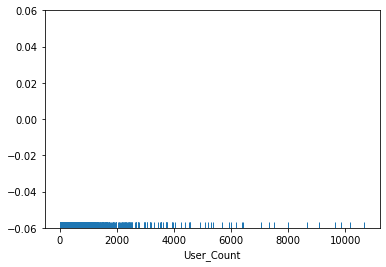

In [29]:
sns.rugplot(x='User_Count',data = df)

In [35]:
uc = df['User_Count'].quantile(0.97)
uc

602.4399999999996

In [36]:
df = df[df['User_Count'] < uc]

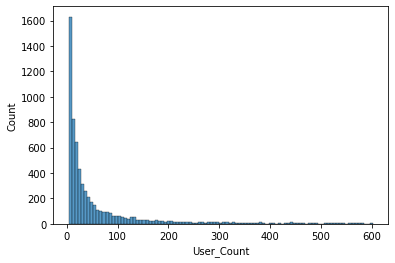

In [37]:
sns.histplot(x='User_Count', data=df)

In [41]:
df['User_Score'] = df['User_Score'].apply(float)

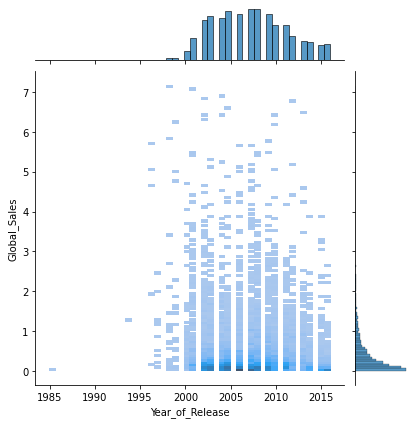

In [39]:
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist');

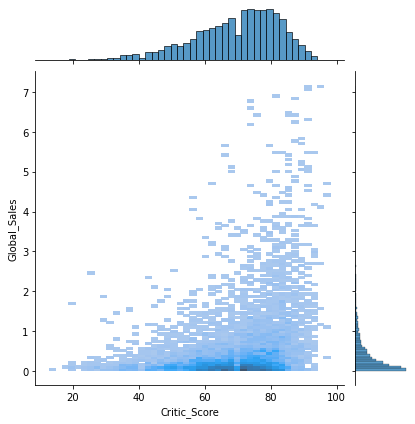

In [40]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist');

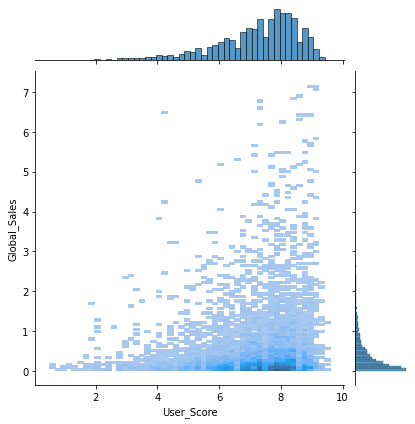

In [42]:
sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist');

In [43]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

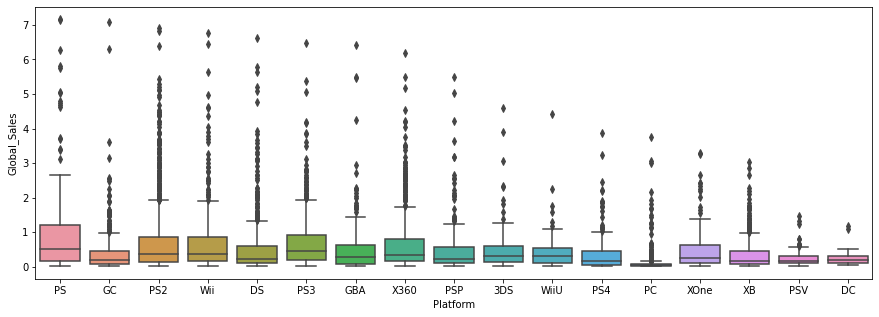

In [44]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

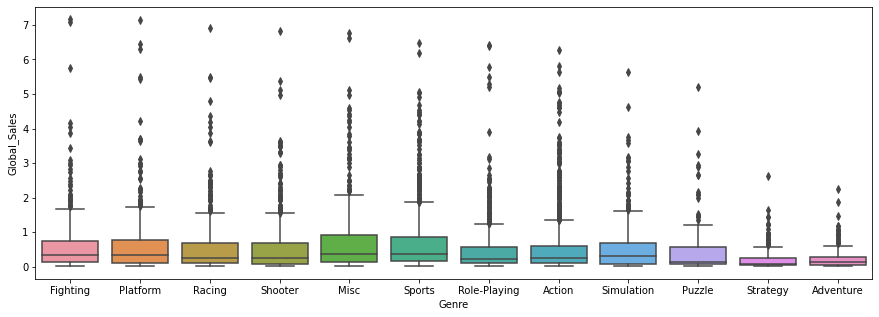

In [45]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

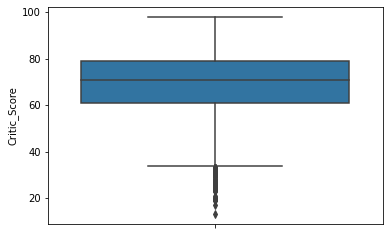

In [46]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계/비교 분석하기
# 두 값의 범위가 다르므로 범위를 동일하게 맞추어 비교
# 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리
sns.boxplot(y='Critic_Score', data=df);

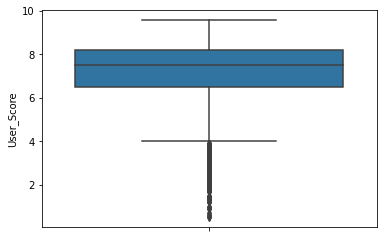

In [62]:
sns.boxplot(y='User_Score', data=df)

In [63]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score': 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [64]:
critic_score[:10]

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
116,74.0,Critics
123,74.0,Critics
126,86.0,Critics
128,87.0,Critics
131,76.0,Critics


In [65]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score': 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [67]:
scores = pd.concat([critic_score, user_score], axis=0)

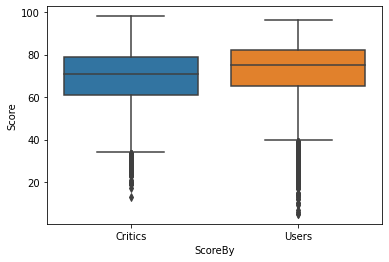

In [68]:
sns.boxplot(x='ScoreBy', y='Score', data=scores)

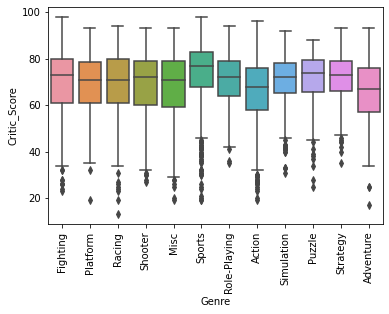

In [69]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

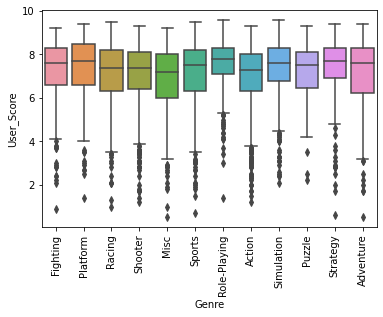

In [70]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

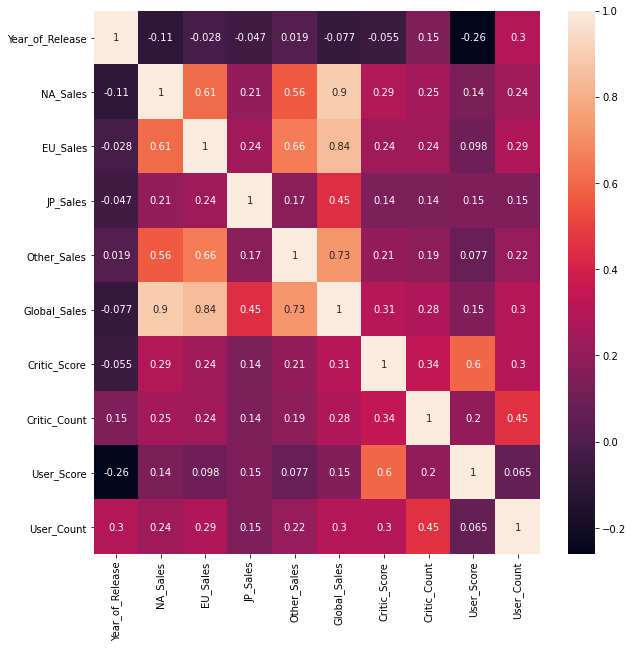

In [71]:
# Correlation Heatmap 시각화
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

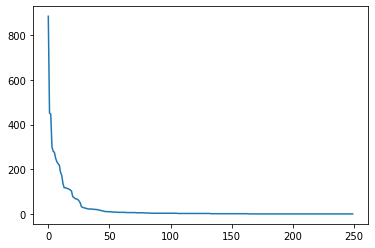

In [75]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb)), pb)

In [77]:
# 상위 20개에서 자르기
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')

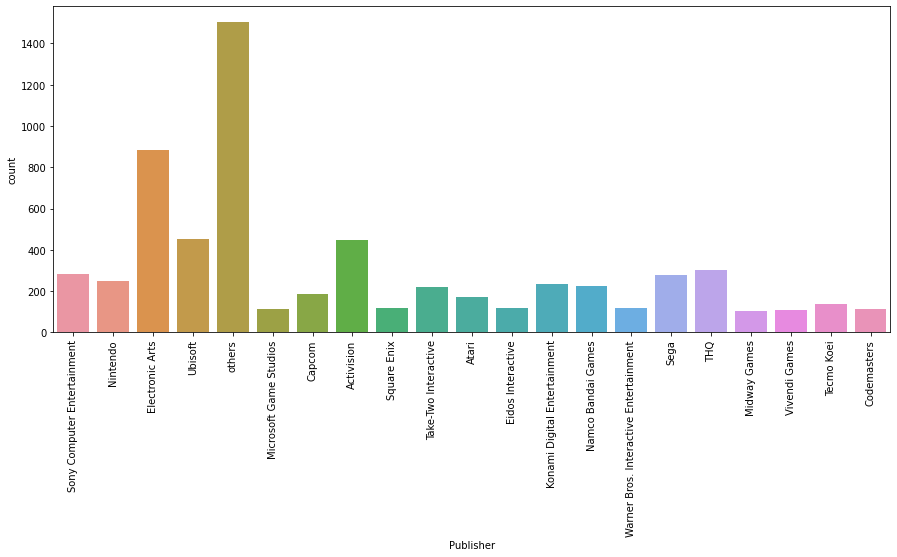

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

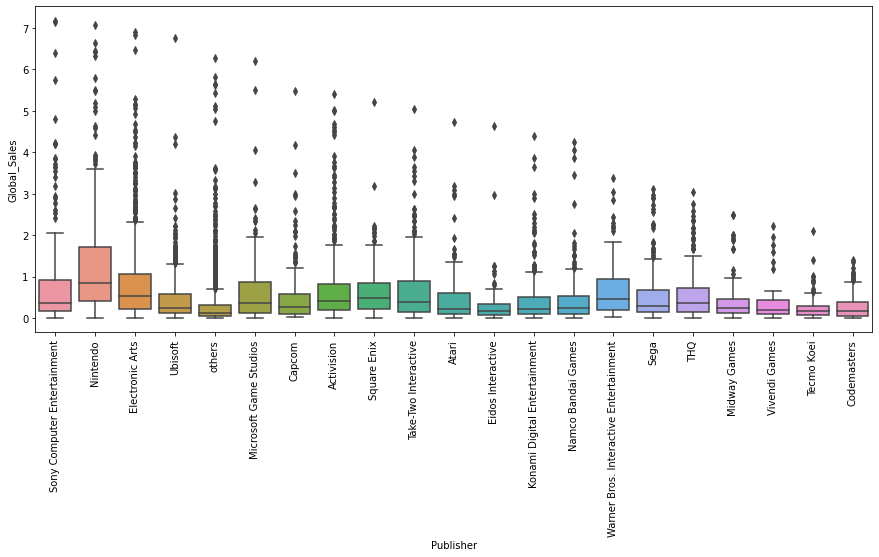

In [81]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

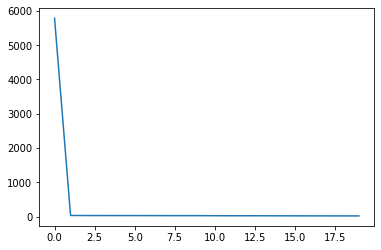

In [87]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev);

In [86]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

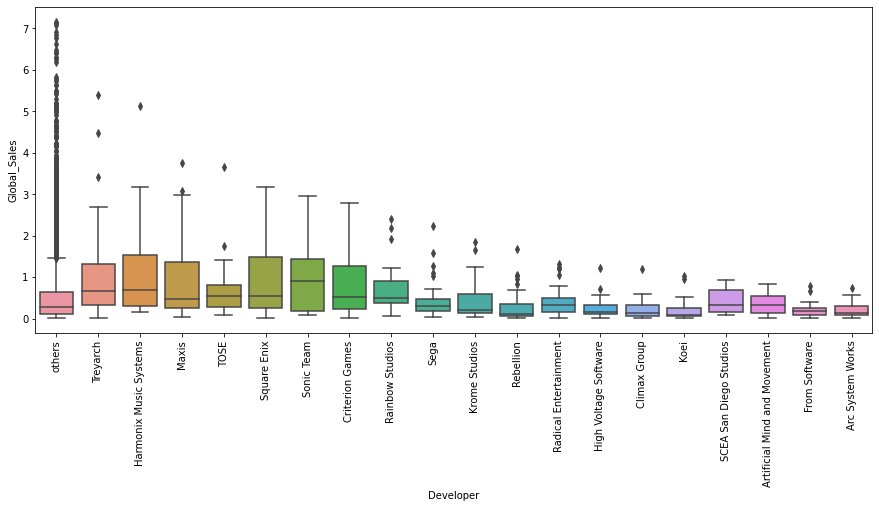

In [88]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

In [89]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [90]:
# 범주형 데이터 전처리
X_cat = df[['Platform','Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

### 전국 판매량 추정 위한 입출력 데이터 구성

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [93]:
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
Y = df['Global_Sales']

In [94]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.239332,1.974028,-0.696024,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.239332,1.605692,-0.870616,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.510334,1.679360,0.642514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.781336,0.942688,0.700712,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.267335,1.384691,0.118739,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [97]:
from xgboost import XGBRegressor

In [98]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[05:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [102]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test,pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test,pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test,pred_lr)))

XGB MAE: 0.39092117135538507
XGB RMSE: 0.6796762768226923
LR MAE: 0.4282726757728417
LR RMSE: 0.6945020224941926


### 실제 값과 추측 값의 Scatter plot 시각화

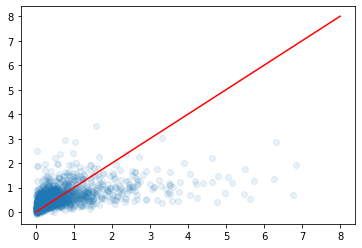

In [103]:
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

- 많이 팔린 것들의 실제 값들이 굉장히 낮게 나옴. underestimate됨.

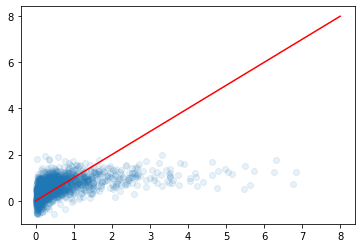

In [104]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

- 심지어 LR에서는 음수까지 출력되기도 함.

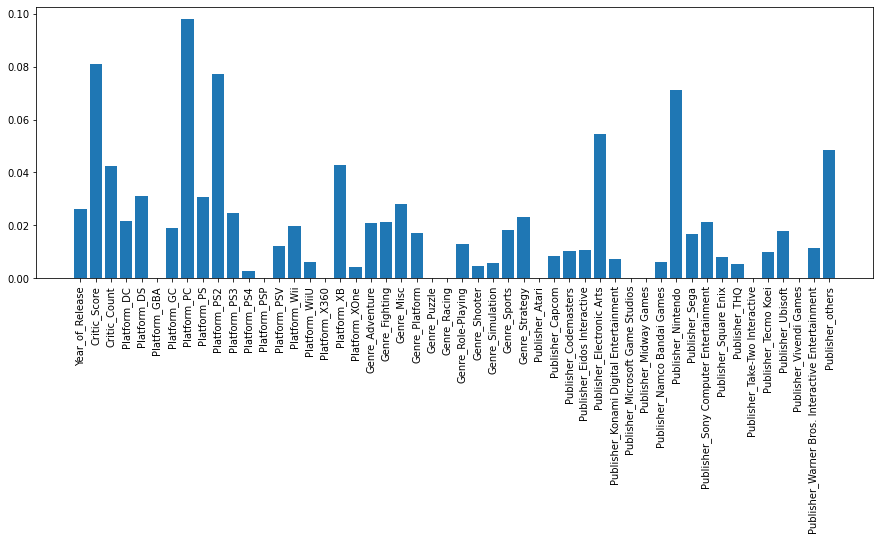

In [105]:
fig = plt.figure(figsize=(15, 5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### 유저 평점 Regression 모델 학습

In [106]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [107]:
# 유저 평점 추정위해 적절한 입출력 컬럼 설정
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
Y = df['User_Score']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [109]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[05:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [111]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test,pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test,pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test,pred_lr)))

XGB MAE: 0.7632716817510771
XGB RMSE: 1.040662625416085
LR MAE: 0.788286842464681
LR RMSE: 1.0611154198591641


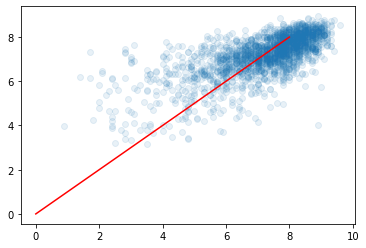

In [112]:
 plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

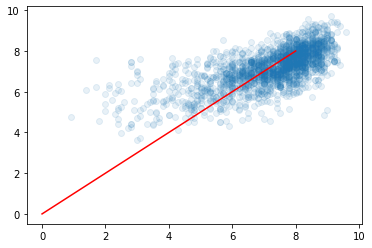

In [113]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

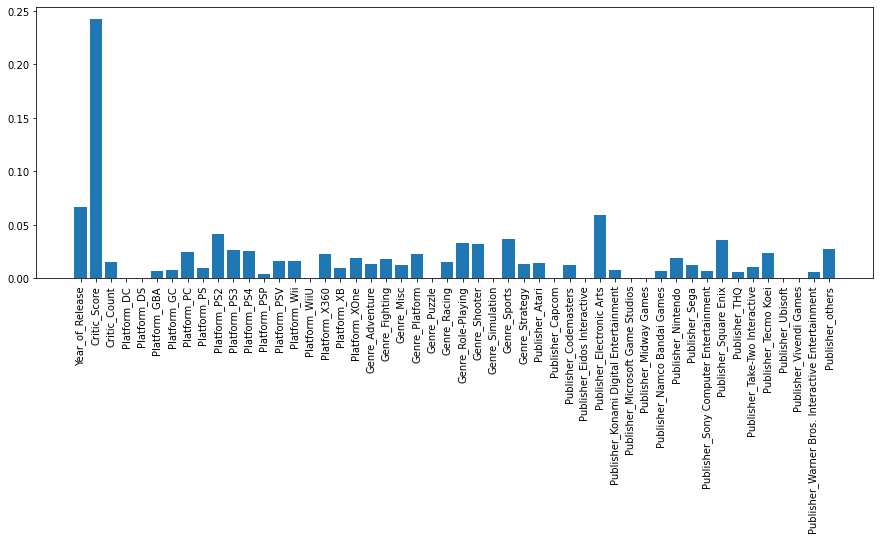

In [114]:
fig = plt.figure(figsize=(15, 5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

- Critic_Score가 가장 높은 영향을 준다!
- 게임을 살 때는 전문가의 의견(Critic_Score)을 적극 반영한다면 실패할 확률이 낮다는 결론. 